In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as sma

In [2]:
df = pd.read_csv('../Data/Cleaned_Data/Final_Cleaned.csv')
df.head()

,category,brand,description,details,is_fassured,rating,discount (%),price,mrp,num_ratings,num_reviews,timestamp,Sales (in crores)
0,Air Conditioner,Midea,Midea 1 Ton 3 Star Split AC - White,Condenser Coil: CopperPower Consumption: 980 W...,1,4.2,48.0,20499.0,39600.0,15595.0,2685.0,2019-08-14 23:49:25.955540,31.968191
1,Air Conditioner,Voltas,Voltas 1.5 Ton 3 Star Split AC - White,Condenser Coil: CopperPower Consumption: 1450 ...,1,4.2,45.0,28499.0,51990.0,5325.0,549.0,2019-08-14 23:49:25.956537,15.175717
2,Air Conditioner,MarQ by Flipkart,MarQ by Flipkart 1.5 Ton 3 Star Split Inverter...,Condenser Coil: CopperPower Consumption: 1650 ...,1,4.2,46.0,24999.0,46999.0,10058.0,1676.0,2019-08-14 23:49:25.957534,25.143994
3,Air Conditioner,Voltas,Voltas 1.5 Ton 3 Star Split Inverter AC - White,Condenser Coil: CopperPower Consumption: 1750 ...,1,4.2,42.0,31999.0,55990.0,4423.0,453.0,2019-08-14 23:49:25.959529,14.153158
4,Air Conditioner,Voltas,Voltas 1.2 Ton 5 Star Split Inverter AC - White,Condenser Coil: CopperPower Consumption: 1010 ...,1,4.1,43.0,30999.0,54990.0,3146.0,478.0,2019-08-14 23:49:25.960526,9.752285


# Performing univariate analysis

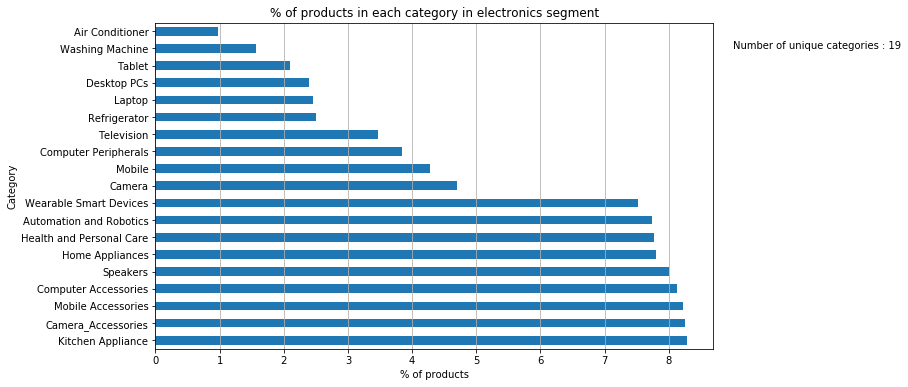

In [3]:
# category
plt.figure(figsize = (10,6))
(df['category'].value_counts()/len(df) * 100).plot(kind = 'barh')
plt.title('% of products in each category in electronics segment')
plt.xlabel('% of products')
plt.ylabel('Category')
plt.grid(b = '--', axis = 'x')
plt.text(9,17, 'Number of unique categories : {}'.format(df['category'].nunique()))
plt.show()

<b>Kitchen Appliances, Camera Accessories, Mobile Accessories</b> and <b>Computer Accessories</b> have higher than 8% products listed.<br> <b> Air Conditioners</b> and <b>Washing Machines</b> have less than 2 % products listed.

In [4]:
# brand
print('Total number of unique brands : {}'.format(df['brand'].nunique()))

Total number of unique brands : 3093


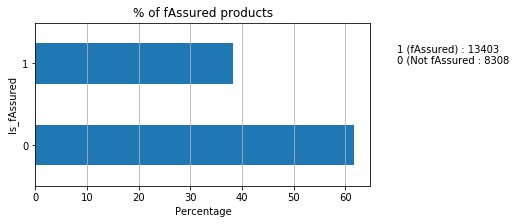

In [5]:
# is_fassured
plt.figure(figsize = (6,3))
(df['is_fassured'].value_counts()/len(df) * 100).plot(kind = 'barh')
plt.title('% of fAssured products')
plt.xlabel('Percentage')
plt.ylabel('Is_fAssured')
plt.grid(b = '--', axis = 'x')
plt.text(70,1, '1 (fAssured) : {} \n0 (Not fAssured : {}'.format((df['is_fassured'].value_counts())[0],\
        (df['is_fassured'].value_counts())[1]))
plt.show()

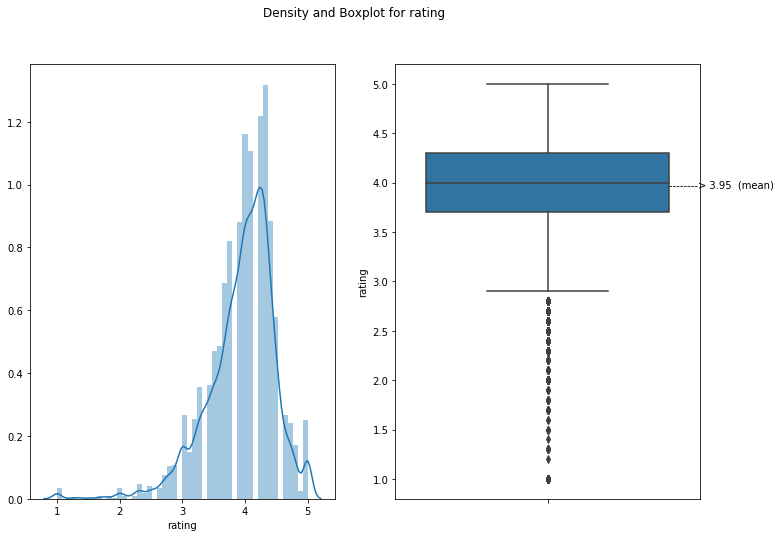

Skewness : -1.2181516911442947, Kurtosis : 3.395799019388092


In [6]:
# rating
rt = df[df['rating'] != 0]['rating']
fig, ax = plt.subplots(1,2, figsize = (12,8))
sns.distplot(rt, kde = True, ax = ax[0])
sns.boxplot(rt, orient = 'v', ax = ax[1])
plt.suptitle('Density and Boxplot for rating')
ax[1].text(0.4, rt.mean(), '--------> {}  (mean)'.format('%.2f'%rt.mean()))
plt.show()
print('Skewness : {}, Kurtosis : {}'.format(rt.skew(), rt.kurtosis()))

Distribution of rating is a bit negatively skewed with average value as 3.95 and median as 4

## Calculating some probabilities using rating :  
- Probability that average rating of any electronic category is >= 4.5 <br>
- Probability that average rating of any electronic category is >= 4.0 <br>
- Probability that average rating of any electronic category is in range [3.5, 4.5] <br>
- Probability that average rating of any electronic category is in range [2.5, 3.5] <br>
- Probability that average rating of any electronic category is <= 2.5

In [7]:
# Excluding 0 rating (Rating scale 1 - 5)
rt = df[df['rating'] != 0]['rating']

# Create relative probabilities for each rating value
rel_proba = df[df['rating'] != 0]['rating'].sort_values().value_counts(normalize = True, sort = False)
rel_proba = pd.DataFrame(rel_proba)
rel_proba.rename(columns = {'rating' : 'relative_probability'}, inplace = True)
rel_proba

,relative_probability
1.0,0.002792
1.5,0.000286
2.0,0.002720
2.5,0.003364
3.0,0.021331
3.5,0.037509
4.0,0.092770
5.0,0.020115
1.3,0.000573
3.6,0.038797


In [8]:
probs, rating_range = [], []

# Calculate probability that at any given time rating is greater or equal 4.5
p_success =  rel_proba.loc[rel_proba.index[rel_proba.index >= 4.5]].sum()[0]
print('Probability that at any given time the average rating of a product in electronic category is \ngreater than or equal 4.5 : {}\n'.format(p_success))
probs.append(p_success*100)
rating_range.append('[4.5 , 5.0]')

# Calculate probability that at any given time rating is greater or equal 4.0
p_success =  rel_proba.loc[rel_proba.index[rel_proba.index >= 4.0]].sum()[0]
print('Probability that at any given time the average rating of a product in electronic category is \ngreater than or equal 4 : {}\n'.format(p_success))
probs.append(p_success*100)
rating_range.append('[4.0 , 5]')

# Calculate probability that at any given time rating is in range [3.5,4.5]
p_success =  rel_proba.loc[rel_proba.index[(rel_proba.index >= 3.5) & (rel_proba.index <= 4.5)]].sum()[0]
print('Probability that at any given time the average rating of a product in electronic category is \nis in range [3.5, 4.5] : {}\n'.format(p_success))
probs.append(p_success*100)
rating_range.append('[3.5 , 4.5]')

# Calculate probability that at any given time rating is in range [2.5,3.5]
p_success =  rel_proba.loc[rel_proba.index[(rel_proba.index >= 2.5) & (rel_proba.index <= 3.5)]].sum()[0]
print('Probability that at any given time the average rating of a product in electronic category is \nis in range [2.5, 3.5] : {}\n'.format(p_success))
probs.append(p_success*100)
rating_range.append('[2.5 , 3.5]')

# Calculate probability that at any given time rating is less or equal 2.5
p_success =  rel_proba.loc[rel_proba.index[rel_proba.index <= 2.5]].sum()[0]
print('Probability that at any given time the average rating of a product in electronic category is \nlesser than or equal 2.5 : {}'.format(p_success))
probs.append(p_success*100)
rating_range.append('[1 , 2.5]')


Probability that at any given time the average rating of a product in electronic category is 
greater than or equal 4.5 : 0.12269148174659986

Probability that at any given time the average rating of a product in electronic category is 
greater than or equal 4 : 0.577594846098783

Probability that at any given time the average rating of a product in electronic category is 
is in range [3.5, 4.5] : 0.7685755189692197

Probability that at any given time the average rating of a product in electronic category is 
is in range [2.5, 3.5] : 0.17773801002147457

Probability that at any given time the average rating of a product in electronic category is 
lesser than or equal 2.5 : 0.0180386542591267


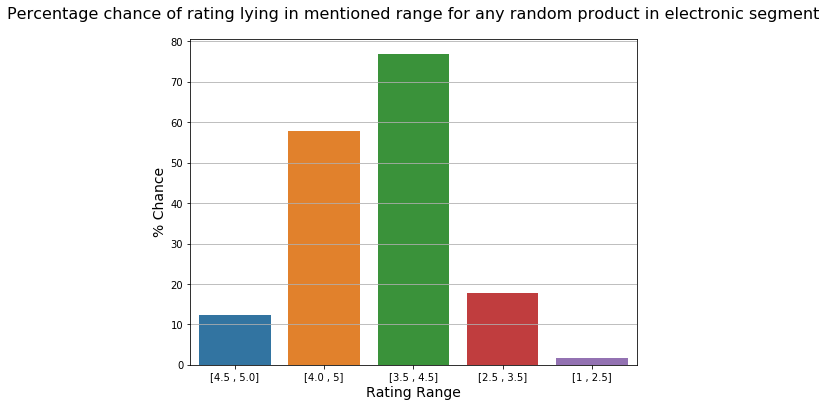

In [9]:
# Visualization of above results
plt.figure(figsize = (8,6))
sns.barplot(x = rating_range, y = probs)
plt.title('Percentage chance of rating lying in mentioned range for any random product in electronic segment', fontdict = {'fontsize' : 16}, pad = 20)
plt.xlabel('Rating Range', fontdict = {'fontsize' : 14})
plt.ylabel('% Chance', fontdict = {'fontsize' : 14})
plt.grid(b = '--', axis = 'y')
plt.savefig('../Percentage_chance_of_rating_lying_in_specified_range.png', bbox_inches = 'tight')
plt.show()

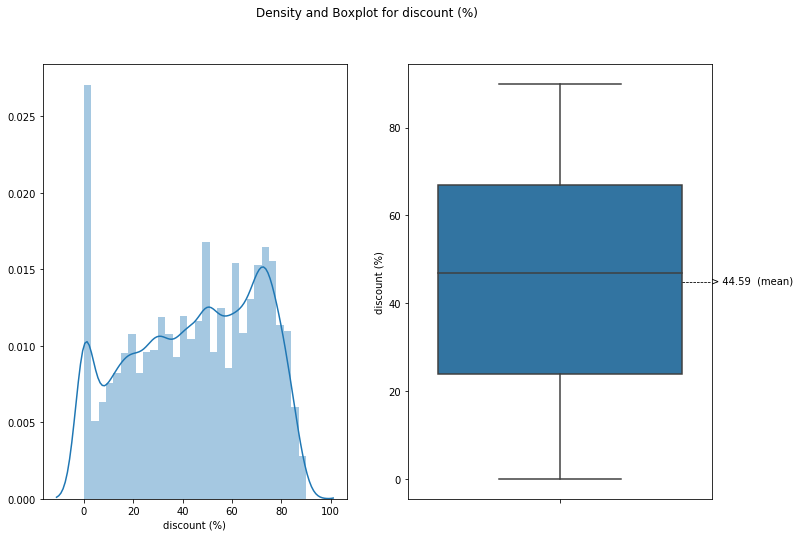

Skewness : -0.2143450156542974, Kurtosis : -1.1262863143647512


In [10]:
# discount
rt = df['discount (%)']
fig, ax = plt.subplots(1,2, figsize = (12,8))
sns.distplot(rt, kde = True, ax = ax[0])
sns.boxplot(rt, orient = 'v', ax = ax[1])
plt.suptitle('Density and Boxplot for discount (%)')
ax[1].text(0.4, rt.mean(), '--------> {}  (mean)'.format('%.2f'%rt.mean()))
plt.show()
print('Skewness : {}, Kurtosis : {}'.format(rt.skew(), rt.kurtosis()))

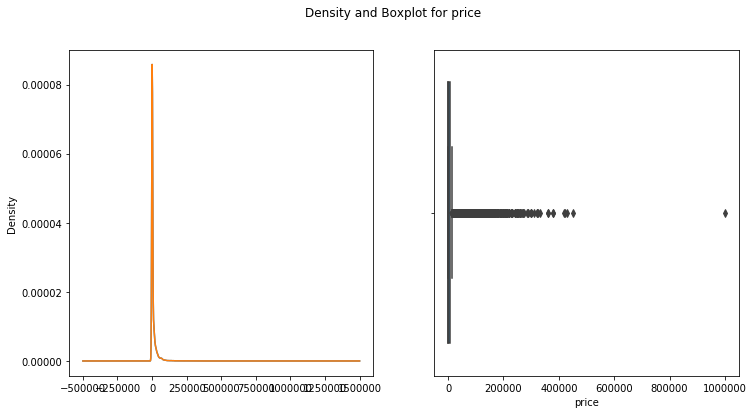

Skewness : 9.112282476372554, Kurtosis : 182.8344244799811


In [11]:
# price
rt = df['price']
fig, ax = plt.subplots(1,2, figsize = (12,6))
rt.plot(kind = 'kde', ax = ax[0])
rt.plot(kind = 'kde', ax = ax[0])
sns.boxplot(rt, ax = ax[1])
plt.suptitle('Density and Boxplot for price')
plt.show()

print('Skewness : {}, Kurtosis : {}'.format(rt.skew(), rt.kurtosis()))

The distribution of price is highly positively skewed and peaked.

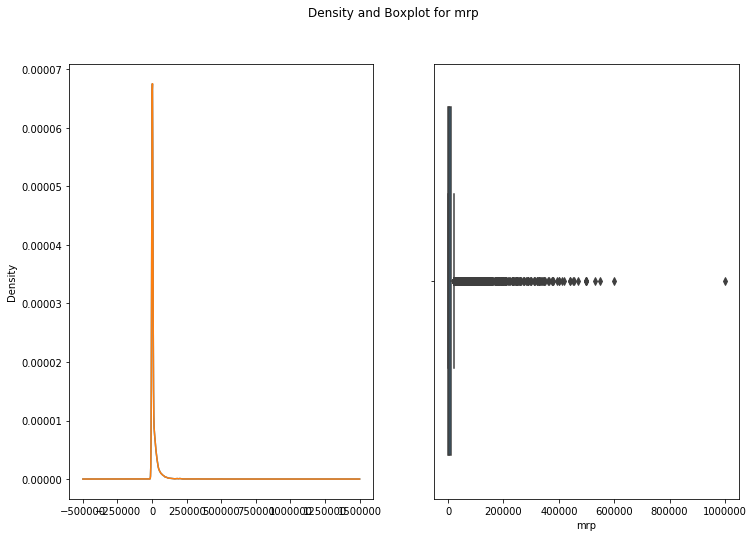

Skewness : 8.477356709046258, Kurtosis : 130.39153641207938


In [12]:
# mrp
rt = df['mrp']
fig, ax = plt.subplots(1,2, figsize = (12,8))
rt.plot(kind = 'kde', ax = ax[0])
rt.plot(kind = 'kde', ax = ax[0])
sns.boxplot(rt, ax = ax[1])
plt.suptitle('Density and Boxplot for mrp')
plt.show()

print('Skewness : {}, Kurtosis : {}'.format(rt.skew(), rt.kurtosis()))

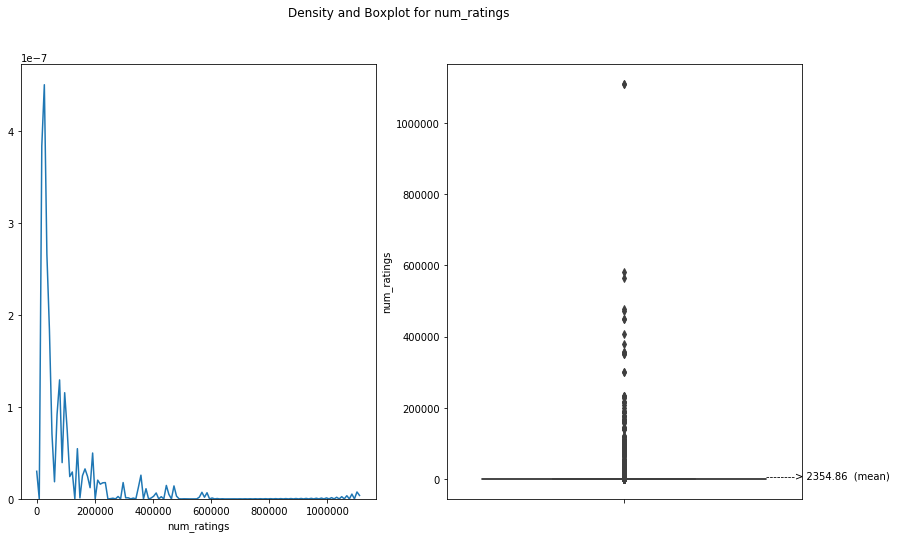

Skewness : 27.99567016105942, Kurtosis : 1121.980704523864


In [13]:
# num_ratings
rt = df[df['num_ratings'] != 0]['num_ratings']
fig, ax = plt.subplots(1,2, figsize = (14,8))
sns.distplot(rt, kde = True, hist = False, ax = ax[0])
sns.boxplot(rt, orient = 'v', ax = ax[1])
plt.suptitle('Density and Boxplot for num_ratings')
ax[1].text(0.4, rt.mean(), '--------> {}  (mean)'.format('%.2f'%rt.mean()))
plt.show()
print('Skewness : {}, Kurtosis : {}'.format(rt.skew(), rt.kurtosis()))

Number of ratings distribution is having very high skewness and highly peaked, with no pattern at all.

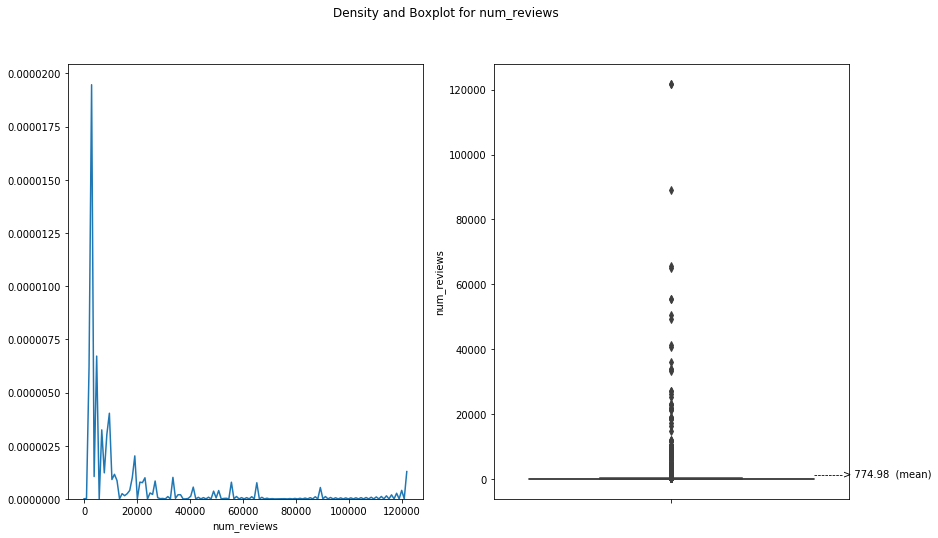

Skewness : 15.053036766458712, Kurtosis : 292.4008977563258


In [14]:
# num_reviews
rt = df[df['num_reviews'] != 0]['num_reviews']
fig, ax = plt.subplots(1,2, figsize = (14,8))
sns.distplot(rt, kde = True, hist = False, ax = ax[0])
sns.boxplot(rt, orient = 'v', ax = ax[1])
plt.suptitle('Density and Boxplot for num_reviews')
ax[1].text(0.4, rt.mean(), '--------> {}  (mean)'.format('%.2f'%rt.mean()))
plt.show()
print('Skewness : {}, Kurtosis : {}'.format(rt.skew(), rt.kurtosis()))

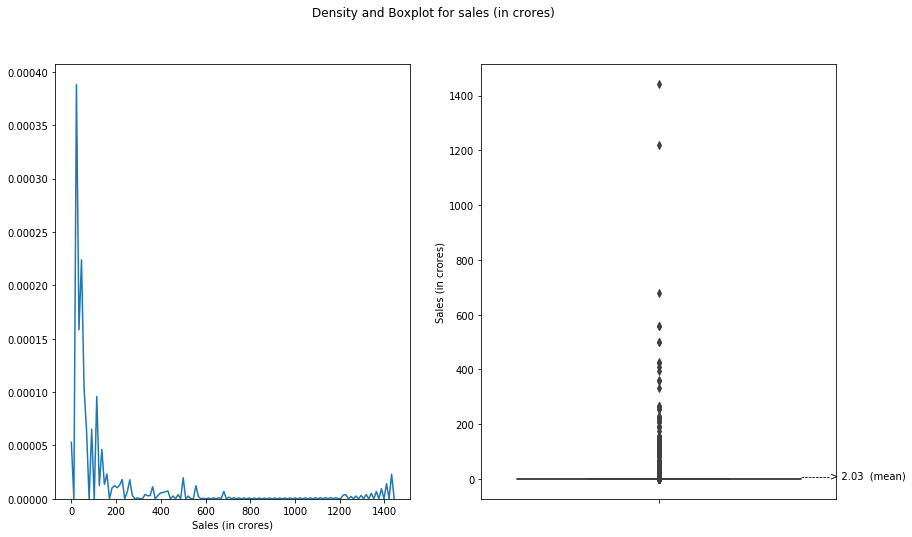

Skewness : 35.12882705476991, Kurtosis : 1707.6136975576756


In [15]:
# Sales (in crores)
rt = df[df['Sales (in crores)'] != 0]['Sales (in crores)']
fig, ax = plt.subplots(1,2, figsize = (14,8))
sns.distplot(rt, kde = True, hist = False, ax = ax[0])
sns.boxplot(rt, orient = 'v', ax = ax[1])
plt.suptitle('Density and Boxplot for sales (in crores)')
ax[1].text(0.4, rt.mean(), '--------> {}  (mean)'.format('%.2f'%rt.mean()))
plt.show()
print('Skewness : {}, Kurtosis : {}'.format(rt.skew(), rt.kurtosis()))

# Performing bi-variate analysis

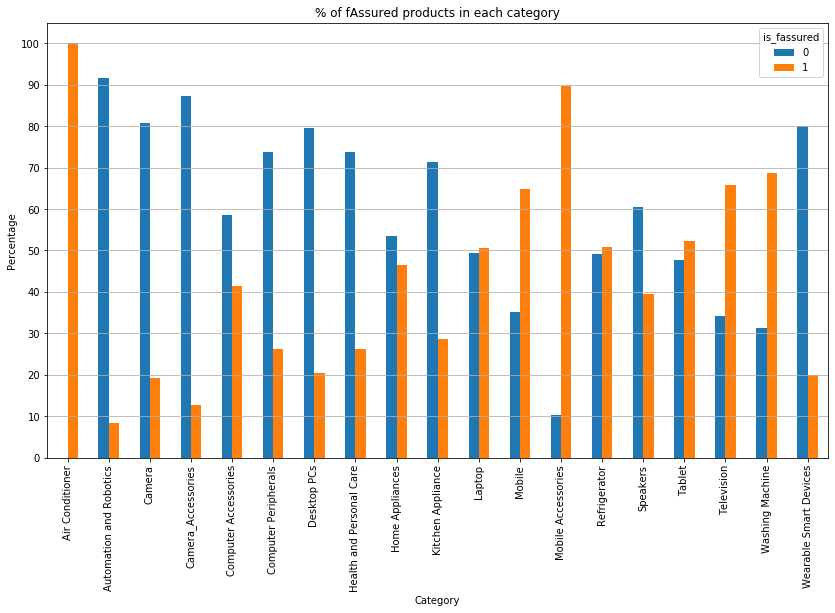

In [16]:
# category and is_fassured
rt = df['is_fassured'].groupby(df['category']).value_counts(normalize = True) * 100
rt.unstack().plot(kind = 'bar', figsize = (14,8))
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('% of fAssured products in each category')
plt.yticks(np.arange(0,101,10))
plt.grid(b = '--', axis = 'y')
plt.show()

In [17]:
# Probability that a new product if taken from each category is fAssured
prob = pd.DataFrame(rt.unstack()[1] / 100)
prob.rename(columns = {1 : 'Probability (fAssured)'}, inplace = True)
prob

,Probability (fAssured)
category,
Air Conditioner,1.000000
Automation and Robotics,0.082787
Camera,0.192157
Camera_Accessories,0.127790
Computer Accessories,0.413930
Computer Peripherals,0.262275
Desktop PCs,0.203846
Health and Personal Care,0.262596
Home Appliances,0.465487


The above table depicts probabilities that if a new product is taken from the website in a particular category then what is the percentage chance that it is <b>fAssured</b>. If, we take a new <b>Mobile</b> then there is 64.83 % chance of it being fAssured. <br> <br>
Note : This is just an estimate and will not depict the actual probability as the sample is not large enough. However, if we have large sample or multiple samples then probabilities of those will tend to represent actual probability. This is law of large numbers.

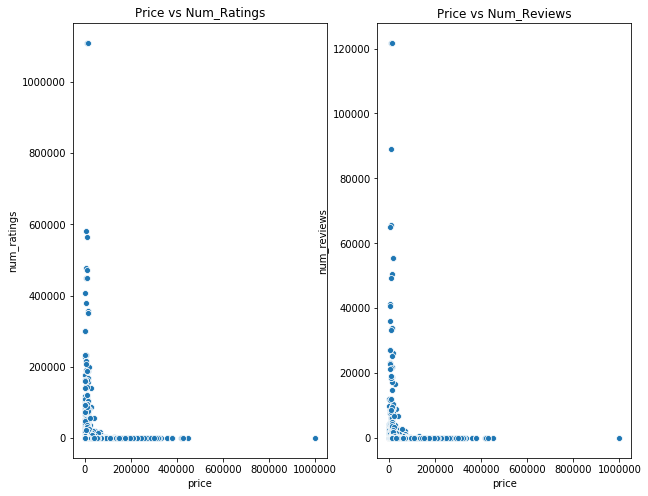

,price,num_ratings,num_reviews
price,1.000000,-0.000445,-0.042891
num_ratings,-0.000445,1.000000,0.976400
num_reviews,-0.042891,0.976400,1.000000


In [18]:
# price and num_ratings, price and num_reviews
fig, ax = plt.subplots(1,2, figsize = (10,8))
sns.scatterplot(x = 'price', y = 'num_ratings', data = df, ax = ax[0])
sns.scatterplot(x = 'price', y = 'num_reviews', data = df, ax = ax[1])
ax[0].set_title('Price vs Num_Ratings')
ax[1].set_title('Price vs Num_Reviews')
plt.show()
df[['price', 'num_ratings', 'num_reviews']].corr()

There is no association between price and num_ratings/num_reviews. But, num_reviews and num_ratings show high positive correlation.

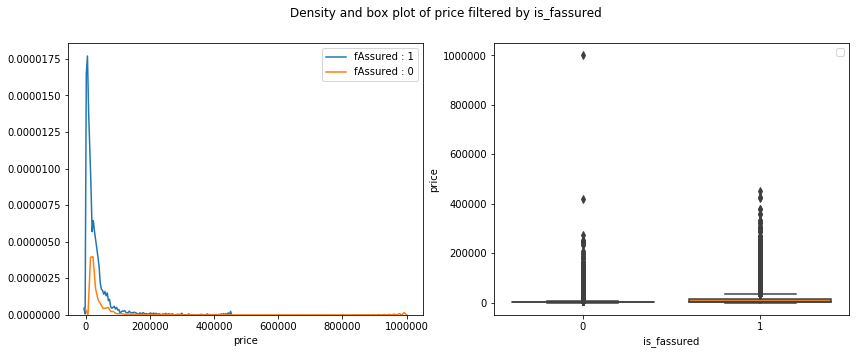

Skewness (Is_fassured : 1): 5.353247851045626      Skewness (Is_fassured : 0): 18.636553098382436


In [19]:
# is_fassured and price
fig, ax = plt.subplots(1,2, figsize = (14,5))
df['is_fassured'] = df['is_fassured'].astype(str)
sns.distplot(df[df['is_fassured'] == '1']['price'], hist = False, label = 'fAssured : 1',ax = ax[0])
sns.distplot(df[df['is_fassured'] == '0']['price'], hist = False, label = 'fAssured : 0', ax = ax[0])
sns.boxplot(x = 'is_fassured', y = 'price', data = df, ax = ax[1])
plt.suptitle('Density and box plot of price filtered by is_fassured')
plt.legend('')
plt.show()
print('Skewness (Is_fassured : 1): {}      Skewness (Is_fassured : 0): {}'.format(df[df['is_fassured'] == '1']['price'].skew(),\
                                                                                 df[df['is_fassured'] == '0']['price'].skew()))

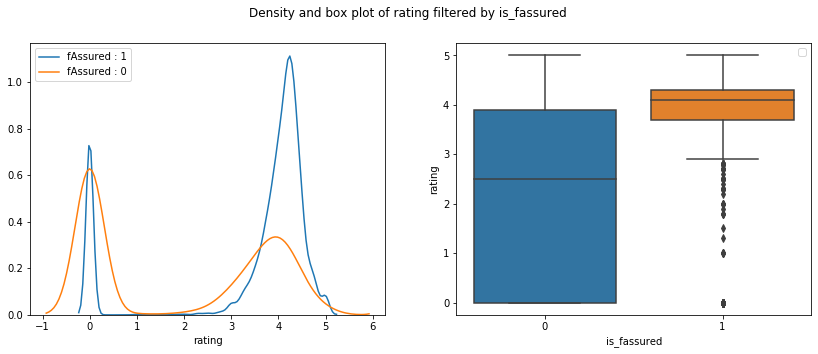

Skewness (Is_fassured : 1): -1.7506547956399579      Skewness (Is_fassured : 0): 0.07679058151954535


In [20]:
# is_fassured and rating
fig, ax = plt.subplots(1,2, figsize = (14,5))
df['is_fassured'] = df['is_fassured'].astype(str)
sns.distplot(df[df['is_fassured'] == '1']['rating'], hist = False, label = 'fAssured : 1',ax = ax[0])
sns.distplot(df[df['is_fassured'] == '0']['rating'], hist = False, label = 'fAssured : 0', ax = ax[0])
sns.boxplot(x = 'is_fassured', y = 'rating', data = df, ax = ax[1])
plt.suptitle('Density and box plot of rating filtered by is_fassured')
plt.legend('')
plt.show()
print('Skewness (Is_fassured : 1): {}      Skewness (Is_fassured : 0): {}'.format(df[df['is_fassured'] == '1']['rating'].skew(),\
                                                                                 df[df['is_fassured'] == '0']['rating'].skew()))

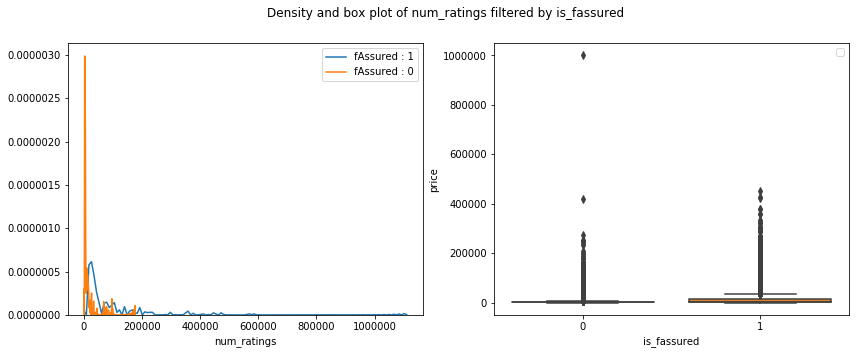

Skewness (Is_fassured : 1): 22.193425267481754      Skewness (Is_fassured : 0): 30.549754473646733


In [21]:
# is_fassured and num_ratings
fig, ax = plt.subplots(1,2, figsize = (14,5))
df['is_fassured'] = df['is_fassured'].astype(str)
sns.distplot(df[df['is_fassured'] == '1']['num_ratings'], hist = False, label = 'fAssured : 1',ax = ax[0])
sns.distplot(df[df['is_fassured'] == '0']['num_ratings'], hist = False, label = 'fAssured : 0', ax = ax[0])
sns.boxplot(x = 'is_fassured', y = 'price', data = df, ax = ax[1])
plt.suptitle('Density and box plot of num_ratings filtered by is_fassured')
plt.legend('')
plt.show()
print('Skewness (Is_fassured : 1): {}      Skewness (Is_fassured : 0): {}'.format(df[df['is_fassured'] == '1']['num_ratings'].skew(),\
                                                                                 df[df['is_fassured'] == '0']['num_ratings'].skew()))

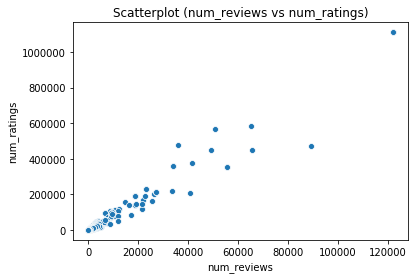

In [22]:
# num_ratings and num_reviews
sns.scatterplot(df['num_reviews'], df['num_ratings'])
plt.title('Scatterplot (num_reviews vs num_ratings)')
plt.show()

<b>Number of reviews</b> and <b>Number of ratings</b> show linear trend.

## Probability that if a user rates a product in a category will also add review for it.

In [23]:
rt_re = df[df['num_reviews'].notnull()][['category', 'num_ratings', 'num_reviews']]
rt_re['Probability'] = rt_re['num_reviews'] / rt_re['num_ratings']
rt_re = rt_re[['category', 'Probability']].groupby('category').mean().sort_values('Probability')
rt_re

,Probability
category,
Mobile,0.141429
Air Conditioner,0.152960
Washing Machine,0.161156
Refrigerator,0.165323
Tablet,0.195065
Laptop,0.208393
Camera,0.245407
Television,0.262738


The above table gives probabilities that if a person rates a product in a particular category will also add review for it. For instance, if a person rates a <b>television</b> then there is <b>26.27 %</b> chance that he will add review for it. Also, in case of <b>mobiles</b> there is only <b>14.14 %</b> chance.  <br> <br>
Note : This calculation is made using an assumption that number of reviews is subset of number of ratings. It means people who review the product must have also rated it. 

## Statistical Tests

One-sample t test on <b>ratings</b>. <br>
Ho : There is no difference between the sample mean ratings and mean ratings for all electronics products. Say, for electronic segment website claims an average rating of 4. <br>
H1 : There is significant difference between mean ratings.

In [24]:
# Again we exclude 0 from rating
mu = 4.0
print(st.ttest_1samp(df[df['rating'] != 0]['rating'], mu))

Ttest_1sampResult(statistic=-11.786891895353962, pvalue=6.459538652139753e-32)


Since, p-value is far less than 0.05 (level of significance), so we reject null hypothesis and conclude that there is significant difference between mean ratings. Infact, mean of sample is less than 4, as t-stat is negative and p_val / 2 < 0.05.

One-sample t test on <b>discount (%)</b>. <br>
Ho : There is no difference between the sample mean discounts and mean discounts for all electronics products. Say, for electronic segment website claims that it gives 45 % discount on average for electronic products. <br>
H1 : There is significant difference between mean discounts.

In [25]:
mu = 45.0
print(st.ttest_1samp(df['discount (%)'], mu))

Ttest_1sampResult(statistic=-2.3734708441949035, pvalue=0.01763043597357117)


p-value is less than 0.05 (level of significance). So, we reject null hypothesis and conclude that there is significant difference between mean discounts. Infact, mean discount of sample is less than 45 %, as t-stat is negative and p_val / 2 < 0.05.

### Let's check if there is any difference between mean ratings of fAssured and non fAssured products.
Ho : There is no difference between mean ratings of fAssured and non fAssured products. <br>
H1 : There is significant difference between mean ratings.

In [26]:
# We use 2-sample t-test.
fassured0 = df[(df['is_fassured'] == '0') & (df['rating'] != 0)]['rating']
fassured1 = df[(df['is_fassured'] == '1') & (df['rating'] != 0)]['rating']
print(st.ttest_ind(fassured0, fassured1))
print('Mean rating of fAssured and non fAssured: {}, {}'.format(fassured1.mean(), fassured0.mean()))
print('Actual difference between means : {}'.format(fassured0.mean() - fassured1.mean()))

Ttest_indResult(statistic=-36.66661484727402, pvalue=4.2122486081562686e-281)
Mean rating of fAssured and non fAssured: 4.103669724770643, 3.784270152505447
Actual difference between means : -0.31939957226519544


As p-value is less than 0.05. So, mean ratings are different for fAssured and non fAssured products in electronics segment. Mean rating of fAssured products are more than non fAssured products.

### Let's check if there is difference in category-wise mean ratings
Ho : Mean rating of all categories are same. <br>
H1 : Mean rating of at least one category is different from others.

In [27]:
dt = df[df['rating'] != 0]
model = sma.ols('rating ~ category', data = dt).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
category,18.0,635.952559,35.330698,144.072819,0.0
Residual,13951.0,3421.176644,0.245228,NaN,NaN


As, p-value is less than 0.05. So, mean rating of at least one category is different from others.

In [28]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#### Let's do post hoc test using pairwise_tukeyhsd to check difference in mean ratings

In [29]:
print(pairwise_tukeyhsd(dt['rating'], dt['category']))

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
         group1                   group2          meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------
         Air Conditioner  Automation and Robotics  -0.4766  0.001 -0.6353 -0.3178   True
         Air Conditioner                   Camera  -0.8304  0.001 -0.9914 -0.6694   True
         Air Conditioner       Camera_Accessories  -0.3476  0.001 -0.4992 -0.1961   True
         Air Conditioner     Computer Accessories  -0.1881  0.001 -0.3265 -0.0497   True
         Air Conditioner     Computer Peripherals   -0.197  0.001 -0.3435 -0.0506   True
         Air Conditioner              Desktop PCs  -0.8833  0.001 -1.0662 -0.7003   True
         Air Conditioner Health and Personal Care  -0.3798  0.001 -0.5204 -0.2392   True
         Air Conditioner          Home Appliances  -0.1214 0.1789 -0.2603  0.0174  False
         Air Conditio

### Let's check if there is difference in category-wise mean number of ratings
Ho : Mean num_ratings of all categories are same. <br>
H1 : Mean num_rating of at least one category is different from others.

In [30]:
model = sma.ols('num_ratings ~ category', data = dt).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
category,18.0,2.767117e+11,1.537287e+10,33.600275,3.474501e-114
Residual,13951.0,6.382893e+12,4.575222e+08,NaN,NaN


Again, p-value is less than 0.05. So, mean number of ratings of at least one category is different from others.

#### Let's do post hoc test using pairwise_tukeyhsd to check difference in mean number of ratings

In [31]:
print(pairwise_tukeyhsd(dt['num_ratings'], dt['category']))

                        Multiple Comparison of Means - Tukey HSD, FWER=0.05                        
         group1                   group2            meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------------------------------------------
         Air Conditioner  Automation and Robotics  -1058.0365    0.9  -7914.3429     5798.27  False
         Air Conditioner                   Camera   -869.5538    0.9  -7823.2996    6084.192  False
         Air Conditioner       Camera_Accessories  -1049.6694    0.9  -7596.2552   5496.9164  False
         Air Conditioner     Computer Accessories   -854.2723    0.9  -6833.3692   5124.8245  False
         Air Conditioner     Computer Peripherals   -838.8085    0.9  -7163.2538   5485.6369  False
         Air Conditioner              Desktop PCs  -1277.7409    0.9  -9179.1192   6623.6374  False
         Air Conditioner Health and Personal Care   1605.7581    0.9  -4468.1349   7679.6511  False


### Let's check if there is difference in category-wise mean Sales (in crores)
Ho : Mean sales of all categories are same. <br>
H1 : Mean sales of at least one category is different from others.

In [32]:
dt.rename(columns = {'Sales (in crores)' : 'Sales_crores'}, inplace = True)
model = sma.ols('Sales_crores ~ category', data = dt).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
category,18.0,3.689291e+05,20496.061743,39.039921,5.336994e-134
Residual,13951.0,7.324312e+06,525.002637,NaN,NaN


As p-value is less than 0.05. So, we reject null hypothesis and conclude that mean sales (in crores) of at least one category is different from others.

## Null Values imputation in num_reviews

In [33]:
df.isnull().sum()

category                 0
brand                    0
description              0
details              16926
is_fassured              0
rating                   0
discount (%)             0
price                    0
mrp                      0
num_ratings              0
num_reviews          16926
timestamp                0
Sales (in crores)        0
dtype: int64

In [34]:
# Creating copy of df
data = df.copy()

### Calculating average ration of num_ratings and num_reviews

In [35]:
# Excluding 0 from num_reviews and num_ratings
n_ratings = data[(data['num_ratings'] != 0) & (data['num_reviews'].notnull()) & (data['num_reviews'] != 0)]['num_ratings']
n_reviews = data[(data['num_ratings'] != 0) & (data['num_reviews'].notnull()) & (data['num_reviews'] != 0)]['num_reviews']
avg_ratio = (n_reviews / n_ratings).mean()
avg_ratio

0.20402476771414454

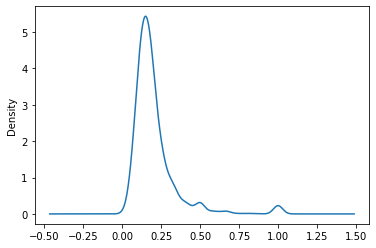

Median : 0.16666666666666666    Mean : 0.20402476771414454


In [36]:
# Distribution of proportion of num_reviews and num_ratings
(n_reviews / n_ratings).plot(kind = 'kde')
plt.show()
print('Median : {}    Mean : {}'.format((n_reviews / n_ratings).median(), avg_ratio))

In [37]:
# Filling null in num_reviews as (avg_ratio * num_ratings)
data['num_reviews'] = data[['num_ratings', 'num_reviews']].apply(lambda x : x[0]*avg_ratio if pd.isnull(x[1]) else x[1], axis = 1)

In [38]:
df['num_reviews'].isnull().sum(), data['num_reviews'].isnull().sum()

(16926, 0)

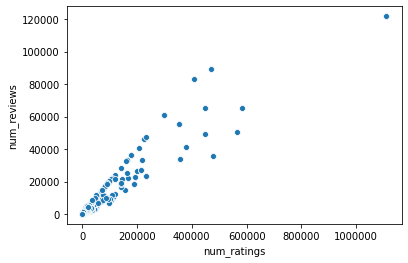

In [39]:
sns.scatterplot(data['num_ratings'], data['num_reviews'])
plt.show()

In [40]:
# Exporting dataframe
data.to_csv('../Data/Cleaned_Data/final_train.csv', index = False)